In [75]:
!pip install openpyxl for reading excel

ERROR: Could not find a version that satisfies the requirement for (from versions: none)
ERROR: No matching distribution found for for


In [76]:
import data_cleaning as dc
dc.main()

The first step in our pipeline involves loading the data into a pandas DataFrame. This is accomplished using the pandas library, which is imported at the beginning of the script.

In [77]:
# Step 1: Load the data
import pandas as pd

df = pd.read_csv('./data/MMNames_clean.csv')

In [78]:
original_labels = df['SR_Name'].astype('category')
label_mapping = original_labels.cat.categories

In [79]:
# Step 2: Prepare the data
import data_preprocessing as dp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

df = dp.preprocess_category(df,'SR_Name')
df = dp.preprocess_onehot(df,'name')



pd.Series(label_mapping).to_csv('./data/class_index_to_region_mapping.csv', index_label='Label', header=['Region'])


y = df['SR_Name'].values 
X = df.drop(columns=['SR_Name']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape)


(13659, 13003) (5854, 13003)


In [80]:
# Step 3: Build a NN model with TensorFlow
import tensorflow as tf
import time
import matplotlib.pyplot as plt

#Model Comparison on Initial and Improved

#Initial Model
def create_initial_classification_model(input_shape, num_classes, params={}):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Improved model 1 - 4 layers
def create_improved_classification_model_1(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Improved model 2 - 5 layers
def create_improved_classification_model_2(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Improved model 3 - 6 layers
def create_improved_classification_model_3(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Improved model 4 - 7 layers with Batch Normalization and Dropout
def create_bn_dropout_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model




In [81]:
def train_and_evaluate(model, model_name):
    print(f"\nTraining {model_name} ...")
    model.summary()

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=50, batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0
    )
    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}, Training Time: {training_time:.2f} sec")

    return history, test_acc, test_loss, training_time

results = {}

In [82]:
# Step 4: Create and train the model
model = create_initial_classification_model(input_shape=[X_train.shape[1]],num_classes=len(df['SR_Name'].unique()), )
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Initial model
model_init = create_initial_classification_model([X_train.shape[1]], len(df['SR_Name'].unique()))
hist_init, acc_init, loss_init, time_init = train_and_evaluate(model_init, 'Initial Model')
results['Initial Model'] = (hist_init, acc_init, loss_init, time_init)

# Improved model 1
model_1 = create_improved_classification_model_1([X_train.shape[1]], len(df['SR_Name'].unique()))
hist_1, acc_1, loss_1, time_1 = train_and_evaluate(model_1, 'Improved Model 1')
results['Improved Model 1'] = (hist_1, acc_1, loss_1, time_1)

# Improved model 2
model_2 = create_improved_classification_model_2([X_train.shape[1]], len(df['SR_Name'].unique()))
hist_2, acc_2, loss_2, time_2 = train_and_evaluate(model_2, 'Improved Model 2')
results['Improved Model 2'] = (hist_2, acc_2, loss_2, time_2)

# Improved model 3
#model_3 = create_improved_classification_model_3([X_train.shape[1]], len(df['SR_Name'].unique()))
#hist_3, acc_3, loss_3, time_3 = train_and_evaluate(model_3, 'Improved Model 3')
#results['Improved Model 3'] = (hist_3, acc_3, loss_3, time_3)

# Improved model 4 with Batch Normalization and Dropout
# BN + Dropout model
model_bn_dp = create_bn_dropout_model([X_train.shape[1]], len(df['SR_Name'].unique()))
hist_bn_dp, acc_bn_dp, loss_bn_dp, time_bn_dp = train_and_evaluate(model_bn_dp, 'BN+Dropout Model')
results['BN+Dropout Model'] = (hist_bn_dp, acc_bn_dp, loss_bn_dp, time_bn_dp)




Training Initial Model ...


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 32)             │       416,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 18)             │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,962 (1.59 MB)

 Trainable params: 416,962 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

Initial Model Test Accuracy: 0.3037, Test Loss: 3.4588, Training Time: 63.55 sec

Training Improved Model 1 ...


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 64)             │       832,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 18)             │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 835,170 (3.19 MB)

 Trainable params: 835,170 (3.19 MB)

 Non-trainable params: 0 (0.00 B)

Improved Model 1 Test Accuracy: 0.2854, Test Loss: 3.8263, Training Time: 86.99 sec

Training Improved Model 2 ...


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 128)            │     1,664,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 18)             │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,675,682 (6.39 MB)

 Trainable params: 1,675,682 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

Improved Model 2 Test Accuracy: 0.2755, Test Loss: 3.4624, Training Time: 132.31 sec

Training BN+Dropout Model ...


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 128)            │     1,664,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,338 (6.39 MB)

 Trainable params: 1,675,890 (6.39 MB)

 Non-trainable params: 448 (1.75 KB)

BN+Dropout Model Test Accuracy: 0.2614, Test Loss: 3.7970, Training Time: 197.39 sec


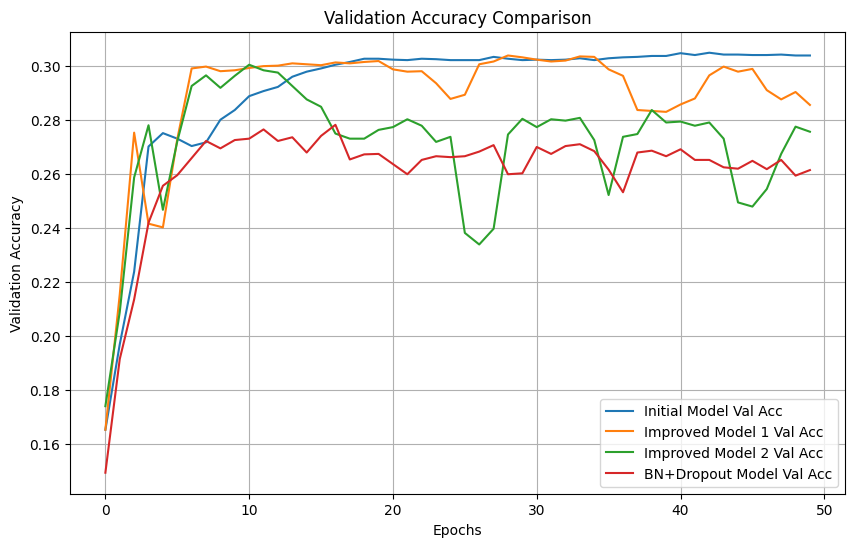

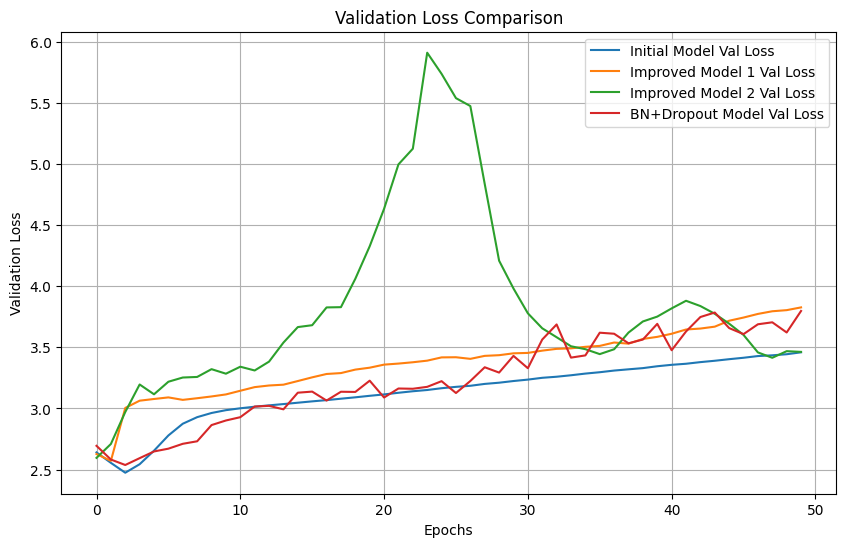

In [83]:
# === Plot accuracy comparison ===
plt.figure(figsize=(10,6))
for name, (history, _, _, _) in results.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Val Acc')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# === Plot loss comparison ===
plt.figure(figsize=(10,6))
for name, (history, _, _, _) in results.items():
    plt.plot(history.history['val_loss'], label=f'{name} Val Loss')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [84]:
# === Summary Table ===
import pandas as pd

summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Val Accuracy': [acc for (_, acc, _, _) in results.values()],
    'Val Loss': [loss for (_, _, loss, _) in results.values()],
    'Training Time (s)': [time for (_, _, _, time) in results.values()]
})

summary_df = summary_df.round(4)
print(summary_df)

# Save summary
summary_df.to_csv('./data/model_comparison_summary.csv', index=False)

              Model  Val Accuracy  Val Loss  Training Time (s)
0     Initial Model        0.3037    3.4588            63.5469
1  Improved Model 1        0.2854    3.8263            86.9885
2  Improved Model 2        0.2755    3.4624           132.3054
3  BN+Dropout Model        0.2614    3.7970           197.3934


In [85]:
# Step 5: Evaluate the model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def save_classification_report(model, X_test, y_test, X_train, y_train, model_name):
    # Predict on test set
    y_pred_test = model.predict(X_test, batch_size=32, verbose=0).argmax(axis=1)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    df_test = pd.DataFrame(report_test).round(2).transpose()
    df_test.to_csv(f'./data/cls_report_test_{model_name}.csv', index=False)
    
    # Predict on train set
    y_pred_train = model.predict(X_train, batch_size=32, verbose=0).argmax(axis=1)
    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    df_train = pd.DataFrame(report_train).round(2).transpose()
    df_train.to_csv(f'./data/cls_report_train_{model_name}.csv', index=False)

    # Test classification report
    y_pred_test_bn_dp = model_bn_dp.predict(X_test, batch_size=32, verbose=0).argmax(axis=1)
    report_test_bn_dp = classification_report(y_test, y_pred_test_bn_dp, output_dict=True)
    report_test_df_bn_dp = pd.DataFrame(report_test_bn_dp).round(2).transpose()
    report_test_df_bn_dp.to_csv('./data/cls_report_test_bn_dp.csv', index=False)

    # Train classification report
    y_pred_train_bn_dp = model_bn_dp.predict(X_train, batch_size=32, verbose=0).argmax(axis=1)
    report_train_bn_dp = classification_report(y_train, y_pred_train_bn_dp, output_dict=True)
    report_train_df_bn_dp = pd.DataFrame(report_train_bn_dp).round(2).transpose()
    report_train_df_bn_dp.to_csv('./data/cls_report_train_bn_dp.csv', index=False)

    
    
    print(f"Saved classification reports for {model_name}")

save_classification_report(model_init, X_test, y_test, X_train, y_train, 'Initial_Model')
save_classification_report(model_1, X_test, y_test, X_train, y_train, 'Improved_Model_1')
save_classification_report(model_2, X_test, y_test, X_train, y_train, 'Improved_Model_2')
save_classification_report(model_bn_dp, X_test, y_test, X_train, y_train, 'BN_Dropout_Model')



Saved classification reports for Initial_Model
Saved classification reports for Improved_Model_1
Saved classification reports for Improved_Model_2
Saved classification reports for BN_Dropout_Model


In [86]:
from sklearn.metrics import classification_report
import pandas as pd

def extract_macro_metrics(model, X, y_true, dataset_type='test'):
    y_pred = model.predict(X, batch_size=32, verbose=0).argmax(axis=1)
    report = classification_report(y_true, y_pred, output_dict=True)
    macro = report['macro avg']
    return {
        'Dataset': dataset_type,
        'Precision': round(macro['precision'], 4),
        'Recall': round(macro['recall'], 4),
        'F1-Score': round(macro['f1-score'], 4)
    }

# Collect metrics
summary_metrics = []

# Initial Model
summary_metrics.append({'Model': 'Initial Model', **extract_macro_metrics(model_init, X_test, y_test, 'Test')})
summary_metrics.append({'Model': 'Initial Model', **extract_macro_metrics(model_init, X_train, y_train, 'Train')})

# Improved Model 1
summary_metrics.append({'Model': 'Improved Model 1', **extract_macro_metrics(model_1, X_test, y_test, 'Test')})
summary_metrics.append({'Model': 'Improved Model 1', **extract_macro_metrics(model_1, X_train, y_train, 'Train')})

# Improved Model 2
summary_metrics.append({'Model': 'Improved Model 2', **extract_macro_metrics(model_2, X_test, y_test, 'Test')})
summary_metrics.append({'Model': 'Improved Model 2', **extract_macro_metrics(model_2, X_train, y_train, 'Train')})

# BN + Dropout Model
summary_metrics.append({'Model': 'BN_Dropout_Model', **extract_macro_metrics(model_bn_dp, X_test, y_test, 'Test')})
summary_metrics.append({'Model': 'BN_Dropout_Model', **extract_macro_metrics(model_bn_dp, X_train, y_train, 'Train')})


df_metrics = pd.DataFrame(summary_metrics)
df_metrics = df_metrics[['Model', 'Dataset', 'Precision', 'Recall', 'F1-Score']]
print(df_metrics)

# Save to CSV
df_metrics.to_csv('./data/classification_macro_summary.csv', index=False)



              Model Dataset  Precision  Recall  F1-Score
0     Initial Model    Test     0.5660  0.2242    0.2841
1     Initial Model   Train     0.8918  0.8650    0.8764
2  Improved Model 1    Test     0.5477  0.2240    0.2751
3  Improved Model 1   Train     0.8968  0.8597    0.8752
4  Improved Model 2    Test     0.5539  0.2194    0.2727
5  Improved Model 2   Train     0.8715  0.8394    0.8523
6  BN_Dropout_Model    Test     0.5024  0.2060    0.2505
7  BN_Dropout_Model   Train     0.8212  0.7838    0.7995


In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test, model_name, label_mapping):
    y_pred_prob = model.predict(X_test, batch_size=32, verbose=0)
    y_pred = y_pred_prob.argmax(axis=1)

    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_mapping, yticklabels=label_mapping)

    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Region')
    plt.ylabel('Actual Region')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'./data/confusion_matrix_{model_name.replace(" ", "_")}.png')
    plt.show()

# === Prepare to store results ===
results = {}
class_labels = sorted(df['SR_Name'].unique())

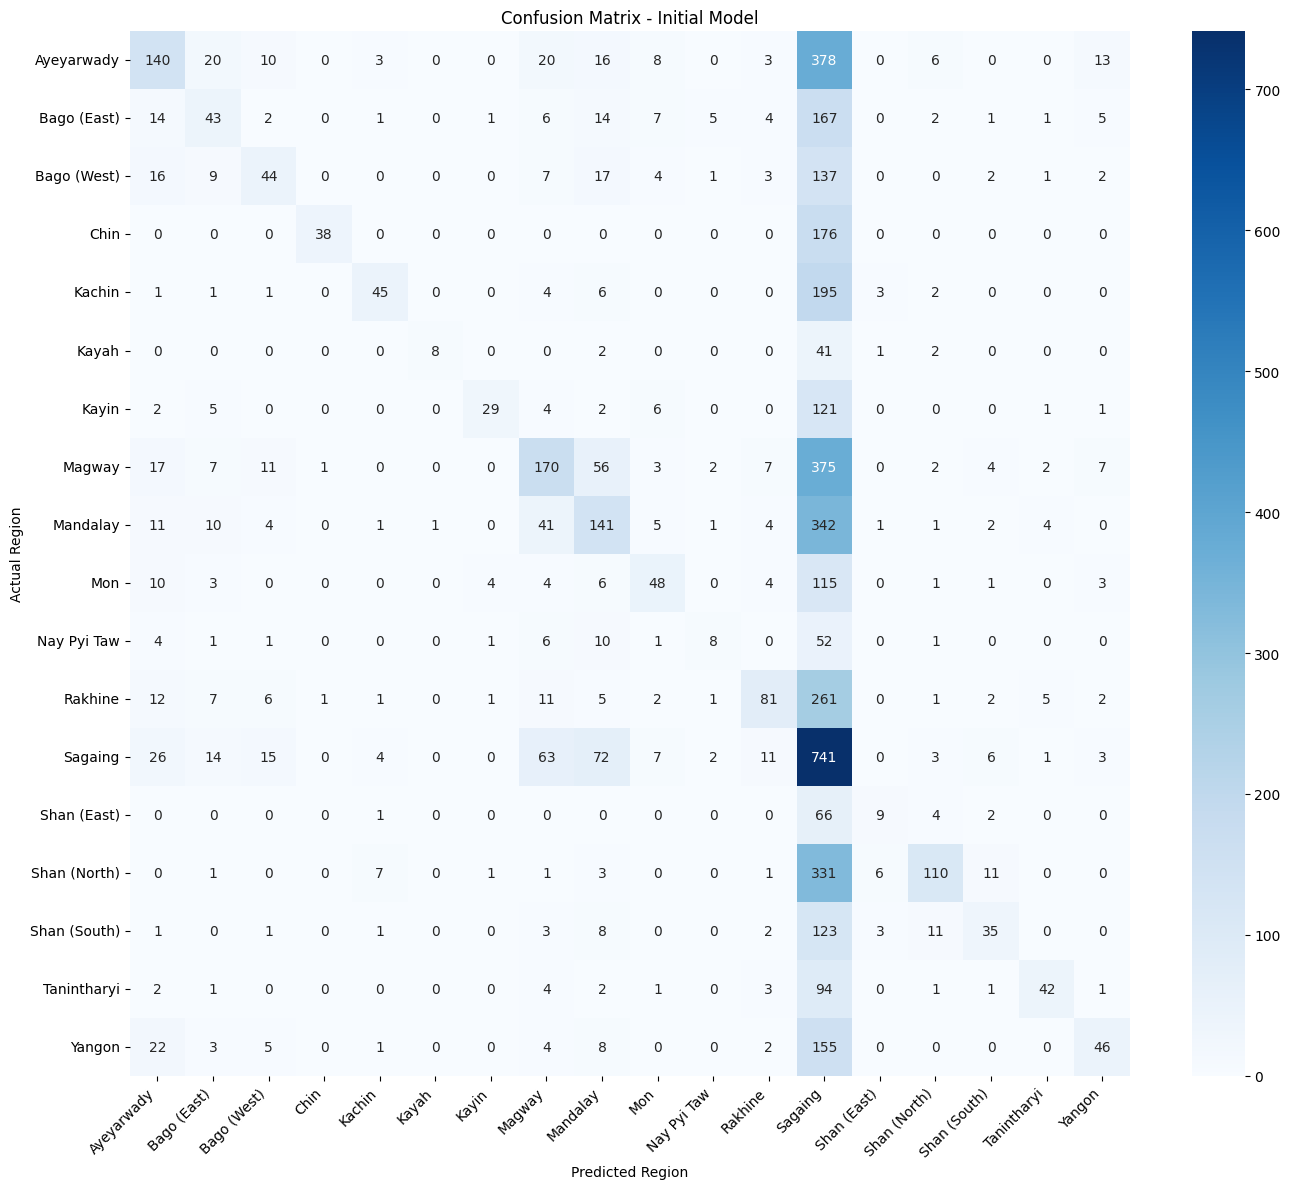

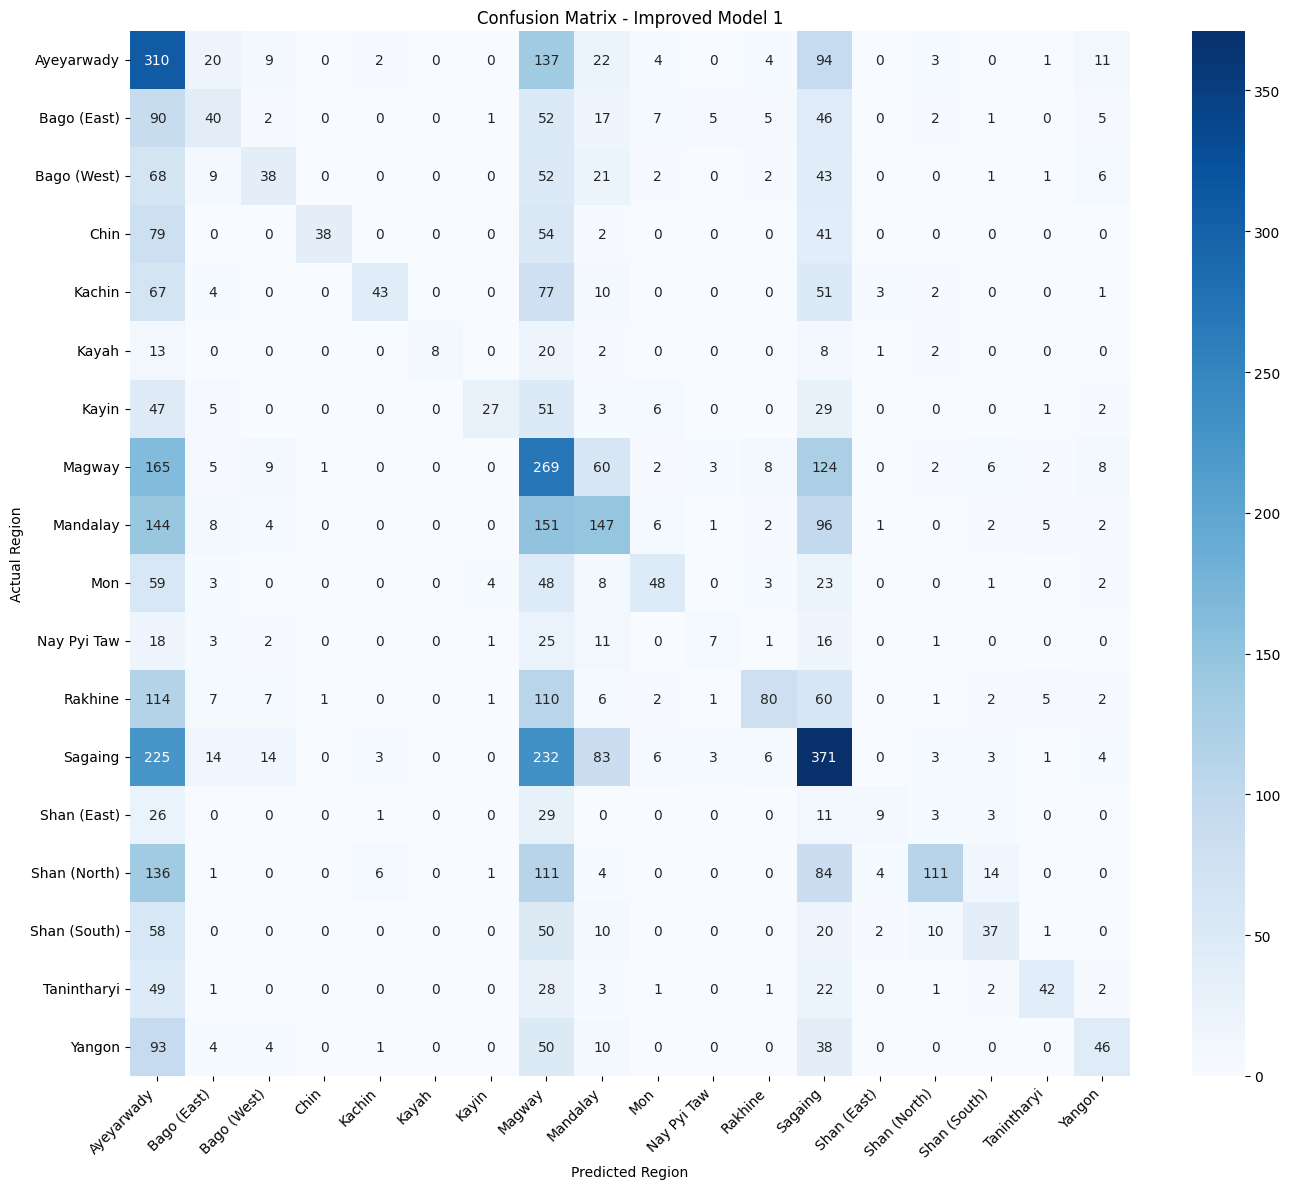

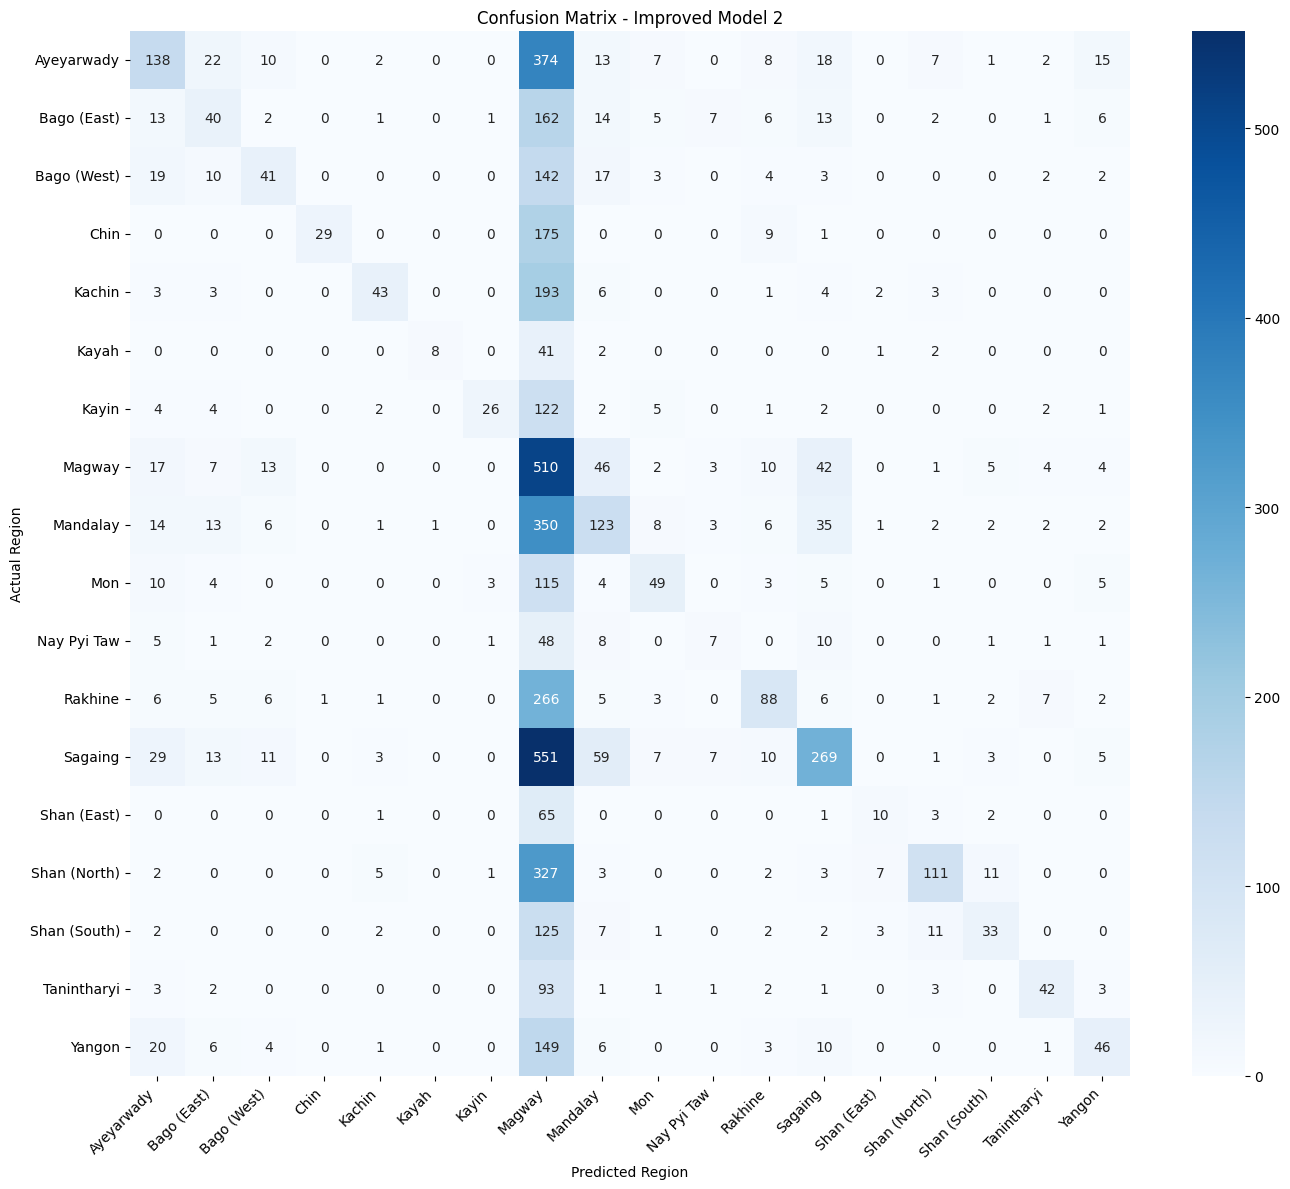

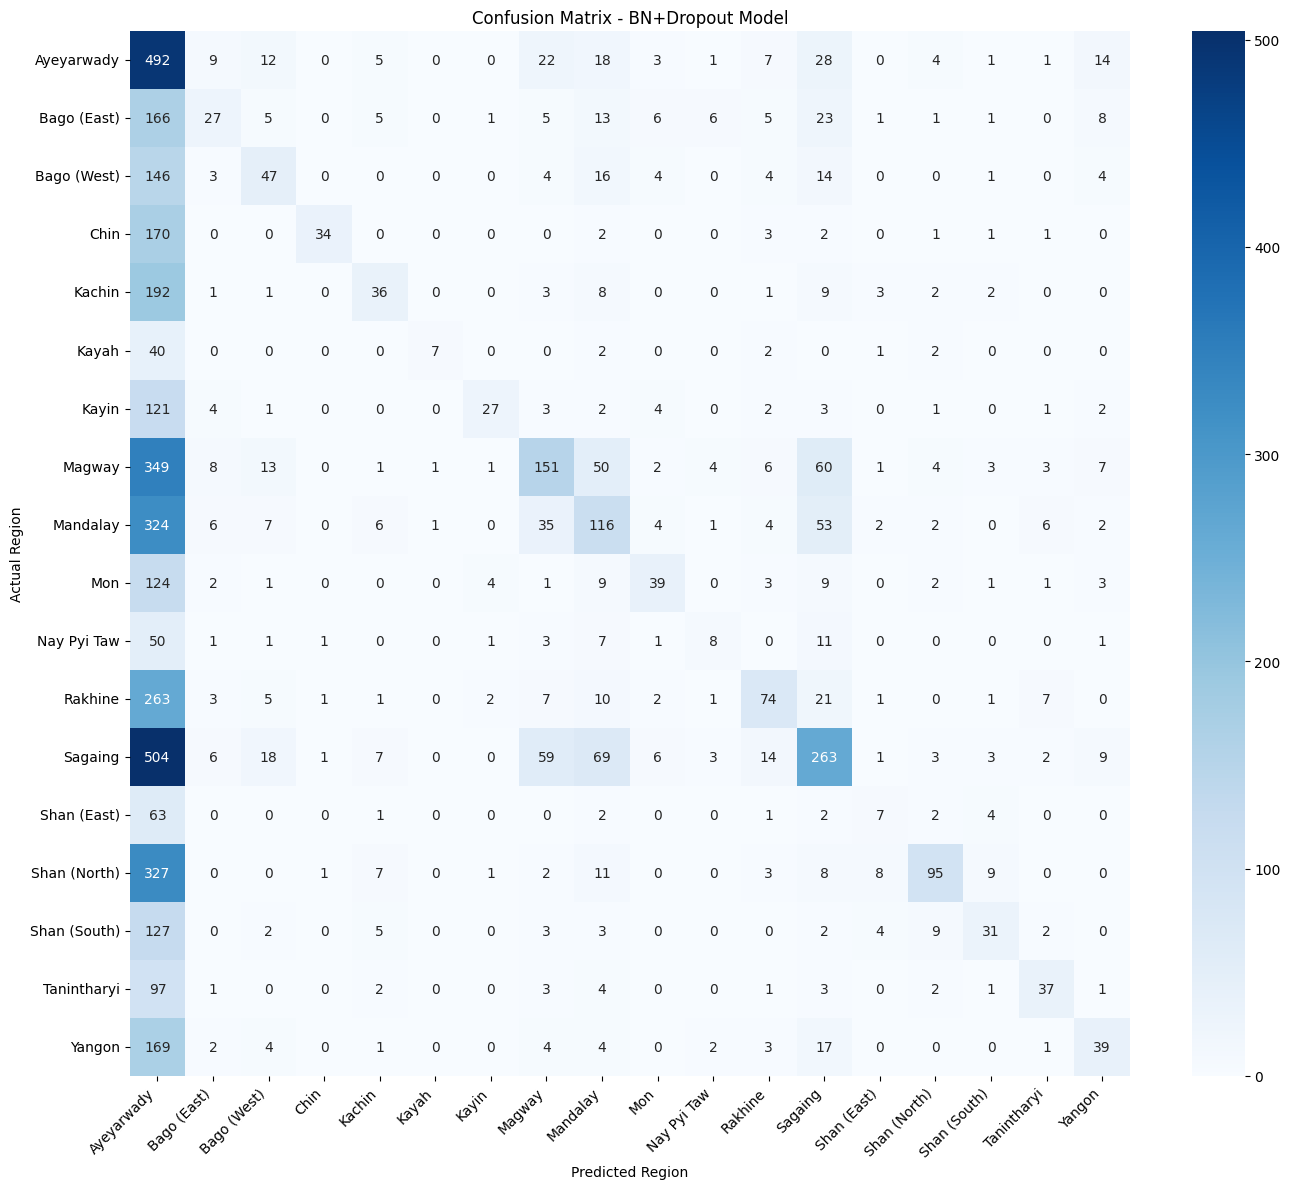

In [89]:
# === Plot confusion matrices for each model ===
plot_confusion_matrix(model_init, X_test, y_test, 'Initial Model', label_mapping)
plot_confusion_matrix(model_1, X_test, y_test, 'Improved Model 1', label_mapping)
plot_confusion_matrix(model_2, X_test, y_test, 'Improved Model 2', label_mapping)
plot_confusion_matrix(model_bn_dp, X_test, y_test, 'BN+Dropout Model', label_mapping)

# initial model
#plot_confusion_matrix(model_init, X_test, y_test, 'Initial Classification Model', class_labels)

# improved model 1
#plot_confusion_matrix(model_1, X_test, y_test, 'Improved Classification Model 1', class_labels)

# improved model 2
#plot_confusion_matrix(model_2, X_test, y_test, 'Improved Classification Model 2', class_labels)

# improved model 3
#plot_confusion_matrix(model_3, X_test, y_test, 'Improved Classification Model 3', class_labels)
